# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Additional libraries
import matplotlib.cm as cmx
import matplotlib.colors as colors


---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Hagmann, Tim]

### Part (b): Course Number

[CS 109a]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [201]:
# Load dataframe
df = pd.read_csv("dataset_HW1.txt", sep = ",")

# Print head
print "Head of the dataframe:\n", df.head(n = 5), "\n"

# Size of the dataframe
print "Data dimensions, i.e., size of the data: ", df.shape

# Range of the numeric columns
vec_min = [min(df["patient_id"]), min(df["marker_1"]), min(df["marker_2"]), min(df["subtype"]), min(df["patient_age"])]
vec_max = [max(df["patient_id"]), max(df["marker_1"]), max(df["marker_2"]), max(df["subtype"]), max(df["patient_age"])]
vec_range = np.empty("")

vec_range = np.empty(0)
for i in range(0, len(vec_max)):
    result = "[" + str(round(vec_min[i], 2)) + ", " + str(round(vec_max[i], 2)) + "]"
    vec_range = np.append(vec_range, [result], axis = 0)

# Create series
vec_min = pd.Series(vec_min, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_max = pd.Series(vec_max, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_range = pd.Series(vec_range, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])

# print "[" + str(vec_min) + ", " + str(vec_max) + "]"
df_results = pd.DataFrame({"min": vec_min,
                           "max": vec_max,
                           "range": vec_range})

print "\n", "Min, max, and range of the dataframe:\n", df_results
# Dataframe

# print "Range of patient id: [", round(min(df["patient_id"]), 2), ", ", round(max(df["patient_id"]), 2), "]"
# print "Range of marker 1: [", round(min(df["marker_1"]), 2), ", ", round(max(df["marker_1"]), 2), "]"
# print "Range of marker 2: [", round(min(df["marker_2"]), 2), ", ", round(max(df["marker_2"]), 2), "]"
# print "Range of subtype: [", round(min(df["subtype"]), 2), ", ", round(max(df["subtype"]), 2), "]"
# print "Range of patient age: [", round(min(df["patient_age"]), 2), ", ", round(max(df["patient_age"]), 2), "]"


Head of the dataframe:
   patient_id   marker_1    marker_2  subtype  patient_age patient_gender
0      619681  21.640523  144.001572      0.0            3         female
1      619711  13.787380  162.408932      0.0           15         female
2      619595  22.675580  130.227221      0.0            6         female
3      619990  13.500884  138.486428      0.0           17           male
4      619157   2.967811  144.105985      0.0            6         female 

Data dimensions, i.e., size of the data:  (2300, 6)

Min, max, and range of the dataframe:
                       max            min                 range
patient_id   622999.000000  619000.000000  [619000.0, 622999.0]
marker_1         80.209748     -22.591722       [-22.59, 80.21]
marker_2        364.221777     -56.388949      [-56.39, 364.22]
subtype           3.000000       0.000000            [0.0, 3.0]
patient_age      90.000000       3.000000           [3.0, 90.0]


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [202]:
# Overall dataset
#----------------
vec_mean = [np.mean(df["patient_id"]), np.mean(df["marker_1"]), np.mean(df["marker_2"]), np.mean(df["subtype"]), np.mean(df["patient_age"])]
vec_median = [np.median(df["patient_id"]), np.median(df["marker_1"]), np.median(df["marker_2"]), np.median(df["subtype"]), np.median(df["patient_age"])]
vec_std = [np.std(df["patient_id"]), np.std(df["marker_1"]), np.std(df["marker_2"]), np.std(df["subtype"]), np.std(df["patient_age"])]

vec_mean = pd.Series(vec_mean, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_median = pd.Series(vec_median, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_std = pd.Series(vec_std, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])

df_results2 = pd.DataFrame({"mean": vec_mean,
                            "median": vec_median,
                            "std": vec_std})

df_all = pd.concat([df_results, df_results2], axis=1)

# df_children = df[(df["patient_age"] >= 3) & (df["patient_age"] <= 17)]
df_children = df.loc[(df["patient_age"] >= 3) & (df["patient_age"] <= 17), :]
df_adult_males = df.loc[(df["patient_age"] >= 18) & (df["patient_age"] <= 90) & (df["patient_gender"] == "male"), :]
df_adult_females = df.loc[(df["patient_age"] >= 18) & (df["patient_age"] <= 90) & (df["patient_gender"] == "female"), :]

# Children
#---------
vec_min = [min(df_children["patient_id"]), min(df_children["marker_1"]), min(df_children["marker_2"]), min(df_children["subtype"]), min(df_children["patient_age"])]
vec_max = [max(df_children["patient_id"]), max(df_children["marker_1"]), max(df_children["marker_2"]), max(df_children["subtype"]), max(df_children["patient_age"])]
vec_range = np.empty(0)
for i in range(0, len(vec_max)):
    result = "[" + str(round(vec_min[i], 2)) + ", " + str(round(vec_max[i], 2)) + "]"
    vec_range = np.append(vec_range, [result], axis = 0)
vec_mean = [np.mean(df_children["patient_id"]), np.mean(df_children["marker_1"]), np.mean(df_children["marker_2"]), np.mean(df_children["subtype"]), np.mean(df_children["patient_age"])]
vec_median = [np.median(df_children["patient_id"]), np.median(df_children["marker_1"]), np.median(df_children["marker_2"]), np.median(df_children["subtype"]), np.median(df_children["patient_age"])]
vec_std = [np.std(df_children["patient_id"]), np.std(df_children["marker_1"]), np.std(df_children["marker_2"]), np.std(df_children["subtype"]), np.std(df_children["patient_age"])]

# Create series
vec_min = pd.Series(vec_min, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_max = pd.Series(vec_max, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_range = pd.Series(vec_range, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_mean = pd.Series(vec_mean, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_median = pd.Series(vec_median, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_std = pd.Series(vec_std, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
    
# print "[" + str(vec_min) + ", " + str(vec_max) + "]"
df_children_summary = pd.DataFrame({"min": vec_min,
                                    "max": vec_max,
                                    "range": vec_range,
                                    "mean": vec_mean,
                                    "median": vec_median,
                                    "std": vec_std})

# Adult male
#-----------
vec_min = [min(df_adult_males["patient_id"]), min(df_adult_males["marker_1"]), min(df_adult_males["marker_2"]), min(df_adult_males["subtype"]), min(df_adult_males["patient_age"])]
vec_max = [max(df_adult_males["patient_id"]), max(df_adult_males["marker_1"]), max(df_adult_males["marker_2"]), max(df_adult_males["subtype"]), max(df_adult_males["patient_age"])]
vec_range = np.empty(0)
for i in range(0, len(vec_max)):
    result = "[" + str(round(vec_min[i], 2)) + ", " + str(round(vec_max[i], 2)) + "]"
    vec_range = np.append(vec_range, [result], axis = 0)
vec_mean = [np.mean(df_adult_males["patient_id"]), np.mean(df_adult_males["marker_1"]), np.mean(df_adult_males["marker_2"]), np.mean(df_adult_males["subtype"]), np.mean(df_adult_males["patient_age"])]
vec_median = [np.median(df_adult_males["patient_id"]), np.median(df_adult_males["marker_1"]), np.median(df_adult_males["marker_2"]), np.median(df_adult_males["subtype"]), np.median(df_adult_males["patient_age"])]
vec_std = [np.std(df_adult_males["patient_id"]), np.std(df_adult_males["marker_1"]), np.std(df_adult_males["marker_2"]), np.std(df_adult_males["subtype"]), np.std(df_adult_males["patient_age"])]

# Create series
vec_min = pd.Series(vec_min, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_max = pd.Series(vec_max, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_range = pd.Series(vec_range, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_mean = pd.Series(vec_mean, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_median = pd.Series(vec_median, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_std = pd.Series(vec_std, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
    
# print "[" + str(vec_min) + ", " + str(vec_max) + "]"
df_adult_males_summary = pd.DataFrame({"min": vec_min,
                                       "max": vec_max,
                                       "range": vec_range,
                                       "mean": vec_mean,
                                       "median": vec_median,
                                       "std": vec_std})

# Adult females
#---------------
vec_min = [min(df_adult_females["patient_id"]), min(df_adult_females["marker_1"]), min(df_adult_females["marker_2"]), min(df_adult_females["subtype"]), min(df_adult_females["patient_age"])]
vec_max = [max(df_adult_females["patient_id"]), max(df_adult_females["marker_1"]), max(df_adult_females["marker_2"]), max(df_adult_females["subtype"]), max(df_adult_females["patient_age"])]
vec_range = np.empty(0)
for i in range(0, len(vec_max)):
    result = "[" + str(round(vec_min[i], 2)) + ", " + str(round(vec_max[i], 2)) + "]"
    vec_range = np.append(vec_range, [result], axis = 0)
vec_mean = [np.mean(df_adult_females["patient_id"]), np.mean(df_adult_females["marker_1"]), np.mean(df_adult_females["marker_2"]), np.mean(df_adult_females["subtype"]), np.mean(df_adult_females["patient_age"])]
vec_median = [np.median(df_adult_females["patient_id"]), np.median(df_adult_females["marker_1"]), np.median(df_adult_females["marker_2"]), np.median(df_adult_females["subtype"]), np.median(df_adult_females["patient_age"])]
vec_std = [np.std(df_adult_females["patient_id"]), np.std(df_adult_females["marker_1"]), np.std(df_adult_females["marker_2"]), np.std(df_adult_females["subtype"]), np.std(df_adult_females["patient_age"])]

# Create series
vec_min = pd.Series(vec_min, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_max = pd.Series(vec_max, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_range = pd.Series(vec_range, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_mean = pd.Series(vec_mean, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_median = pd.Series(vec_median, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
vec_std = pd.Series(vec_std, 
                   index = ["patient_id", "marker_1", "marker_2", "subtype", "patient_age"])
    
# print "[" + str(vec_min) + ", " + str(vec_max) + "]"
df_adult_females_summary = pd.DataFrame({"min": vec_min,
                                         "max": vec_max,
                                         "range": vec_range,
                                         "mean": vec_mean,
                                         "median": vec_median,
                                         "std": vec_std})
print df_adult_females_summary
df_all_statistics = df_all.append(df_children_summary)


                       max           mean         median            min  \
patient_id   622999.000000  622502.176250  622504.000000  622001.000000   
marker_1         59.702106      44.053269      43.911490      28.364561   
marker_2        190.047718      74.006378      73.086403     -43.386768   
subtype           1.000000       0.500000       0.500000       0.000000   
patient_age      90.000000      54.613750      56.000000      18.000000   

                            range         std  
patient_id   [622001.0, 622999.0]  288.903756  
marker_1            [28.36, 59.7]    7.137115  
marker_2         [-43.39, 190.05]   53.286957  
subtype                [0.0, 1.0]    0.500000  
patient_age          [18.0, 90.0]   21.080846  


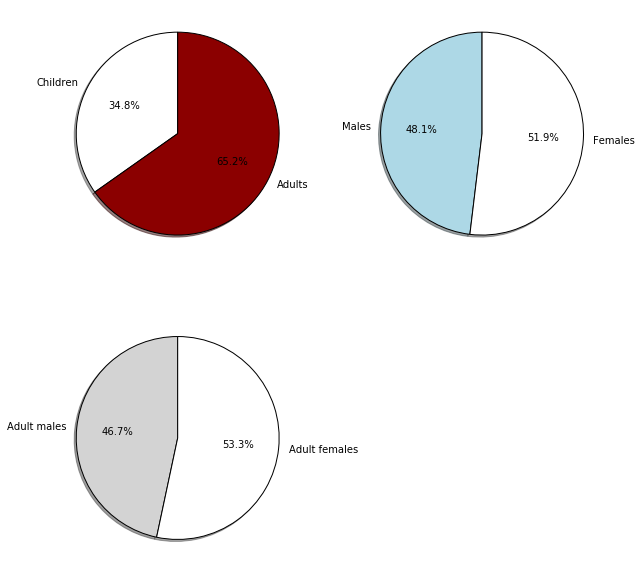

In [203]:
## Children vs Adults
labels = ['Children', 'Adults']
sizes = [df.loc[df["patient_age"] <= 17, ].shape[0], df.loc[df["patient_age"] >= 18, ].shape[0]]
color_vec = ['white', 'darkred']

# Plot
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
ax1.pie(sizes, labels=labels, colors=color_vec,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Women vs Men
ax2 = fig.add_subplot(222)
ax2.pie([df.loc[df["patient_gender"] == "male", ].shape[0], df.loc[df["patient_gender"] == "female", ].shape[0]],
        labels=['Males', 'Females'],
        colors=['lightblue', 'white'],
        autopct='%1.1f%%', shadow=True, startangle=90)


## Adult males vs adult females
ax3 = fig.add_subplot(223)
ax3.pie([df.loc[(df["patient_age"] >= 18) & (df["patient_gender"] == "male"), ].shape[0], df.loc[(df["patient_age"] >= 18)  & (df["patient_gender"] == "female"), ].shape[0]],
        labels=['Adult males', 'Adult females'],
        colors=['lightgrey', 'white'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:


1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

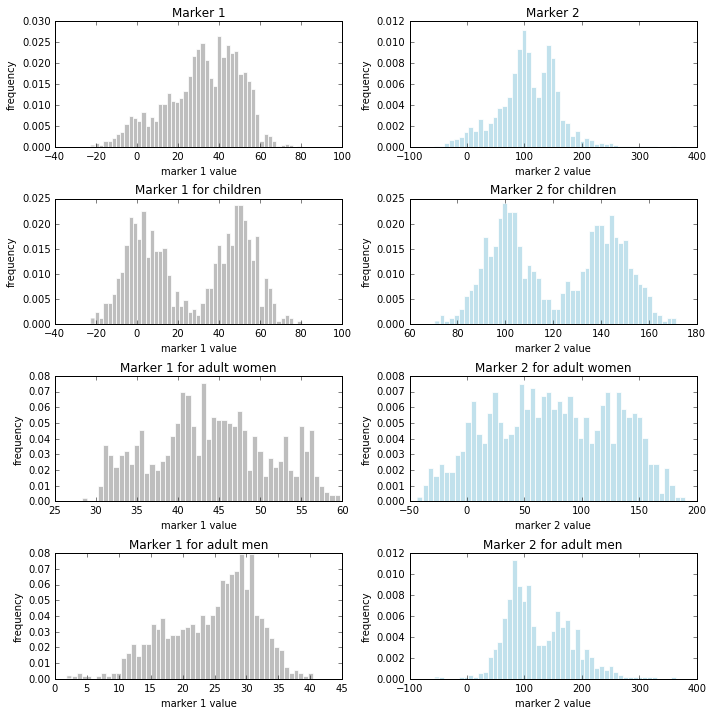

In [204]:
#Create three different datasets by filtering our entire set
children_data = df[df['patient_age'] < 18]
adult_women_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]
adult_male_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
    

#function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    axes.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75,
         edgecolor='white')
    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('frequency')
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'],
                'Marker 1', 
                'marker 1 value', 
                'darkgrey', 
                ax1)

ax2 = plot_hist(df['marker_2'],
                'Marker 2', 
                'marker 2 value', 
                'lightblue', 
                ax2)

ax3 = plot_hist(children_data['marker_1'],
                'Marker 1 for children', 
                'marker 1 value', 
                'darkgrey', 
                ax3)

ax4 = plot_hist(children_data['marker_2'],
                'Marker 2 for children', 
                'marker 2 value', 
                'lightblue', 
                ax4)

ax5 = plot_hist(adult_women_data['marker_1'],
                'Marker 1 for adult women', 
                'marker 1 value', 
                'darkgrey', 
                ax5)

ax6 = plot_hist(adult_women_data['marker_2'],
                'Marker 2 for adult women', 
                'marker 2 value', 
                'lightblue', 
                ax6)

ax7 = plot_hist(adult_male_data['marker_1'],
                'Marker 1 for adult men', 
                'marker 1 value', 
                'darkgrey', 
                ax7)

ax8 = plot_hist(adult_male_data['marker_2'],
                'Marker 2 for adult men', 
                'marker 2 value', 
                'lightblue', 
                ax8)

plt.tight_layout()
plt.show()

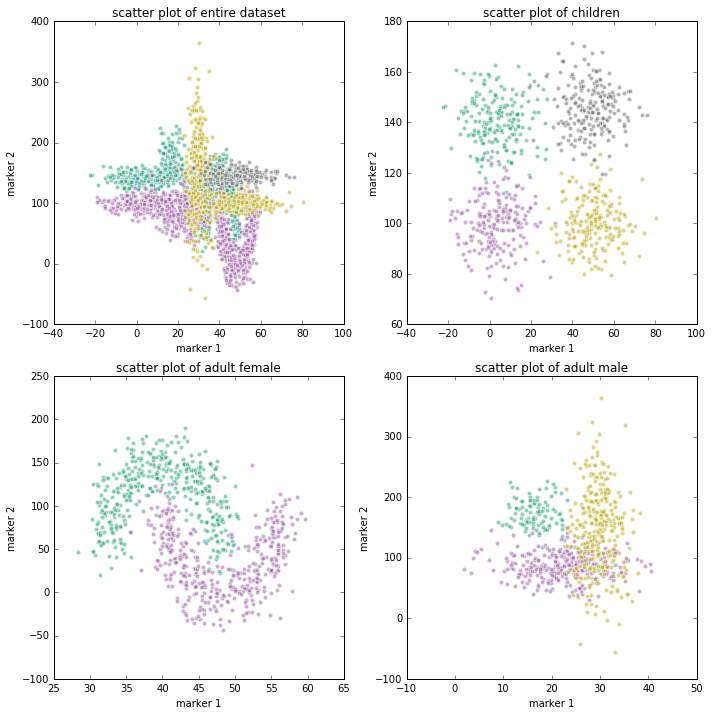

In [205]:
def plot_scatter(data, plot_title, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1, groups) 
    #get a color map
    c_map = plt.get_cmap('Dark2') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group in xrange(groups):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        axes.scatter(data[data['subtype'] == group]['marker_1'], 
                     data[data['subtype'] == group]['marker_2'], 
                     c=color, 
                     alpha = 0.5,
                     edgecolor='white')

    axes.set_title(plot_title) 
    axes.set_xlabel(x_lable)
    axes.set_ylabel(y_lable)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', 4, ax1)
plot_scatter(children_data, 
             'scatter plot of children', 
             'marker 1', 'marker 2', 
             4,
             ax2)  
plot_scatter(adult_women_data, 
             'scatter plot of adult female', 
             'marker 1', 
             'marker 2', 
             4, 
             ax3)  
plot_scatter(adult_male_data, 
             'scatter plot of adult male', 
             'marker 1', 
             'marker 2', 
             4, 
             ax4) 

plt.tight_layout()
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

An analysis of the data shows. That there is roughly a 1/3 children, 1/3 adults males and 1/3 adult females in the data. (See pie charts above).

The histograms show, that marker value 1 goes from -20 to around 80 and marker value 2 from 0 to 200. However, the marker values are not evenly distributed among the 3 different groups. Children can quit easily be separated by the marker values while the adult men and adult women group lies closer together.

Especially the scatter plot show, that while the children show 4 distinctive groups, adult women start to blur together. This effect increases with the group of the adult males where two marker heavily overlap.

The most useful graphic for the analysis of the different pattern is the scatterplot. It most clearly shows the different pattern and relationships.

Both, the histogram as well as the scatterplots can be used to have an indication of the mean, distribution, range, variation etc. of the data. However, the histogram is useful to visualize the distribution aspect of the data while the scatterplot helps to show the relationsshiop between the markers and the diabetic subtypes. 

The statistics support in principle the visual analysis. However, they do not offer a complete picture of the relationships while the graphs are much brother in their reach. 

It appears, that there is a relationship between the biometic markers and the diabetic subtypes. This relationship distinguishes very well in the subgroup of the children while the relationship is not as clear in the adult population. 



---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

The graphs in question one did show a relationship between the biomarkes and the diabetic subtypes. Taking the group mean as a proxy for the similarity is therefore very reasonable. 

Furthermore, taking a set of new data and comparing them with the group mean is a very reasonable assumtion. This because the subgroups of subtypes are big enough to even out random variation that might occur in the data.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:** Functions

In [235]:
# Classification function of subtypes (with the euclidian distance)
def classify(df_train, df_test):
    # Create mean vector for marker 1
    vec_mean1 = np.empty(0)
    n_uniq_subtypes = len(df_train["subtype"].unique())
    for i in range(0, n_uniq_subtypes):
        result = np.mean(df_train.loc[df_train["subtype"] == df_train["subtype"].unique()[i], "marker_1"])
        vec_mean1 = np.append(vec_mean1, [result], axis = 0)

    # Create mean vector for marker 2
    vec_mean2 = np.empty(0)
    for i in range(0, len(df_train["subtype"].unique())):
        result = np.mean(df_train.loc[df_train["subtype"] == df_train["subtype"].unique()[i], "marker_2"])
        vec_mean2 = np.append(vec_mean2, [result], axis = 0)

    # Calculate the euclidiean distance
    x = np.zeros(df_test.shape[0])
    for j in range(0, len(df_test)):
        df_dist = pd.DataFrame({'subtype': range(0, n_uniq_subtypes),
                                'distance': np.zeros(n_uniq_subtypes)}).reset_index(drop=True)

        for i in range(0, len(df_test["subtype"].unique())):
            df_dist.loc[i, 'distance'] = np.sqrt((df_test.loc[j, 'marker_1'] - vec_mean1[i]) ** 2 + (df_test.loc[j, 'marker_2'] - vec_mean2[i]) ** 2)
    
        x[j] = df_dist.loc[df_dist['distance'] == min(df_dist['distance'])]['subtype']

    return x

# Evaluation function
def evaluate(actual, prediction):
    return float(np.sum(actual == prediction)) / len(actual) * 100

**Prediction:** Children

In [236]:
# Create test and training set
np.random.seed(1234) # Set seed
msk = np.random.rand(len(df_children)) < 0.7
df_train_child = df_children[msk].reset_index(drop=True)
df_test_child = df_children[~msk].reset_index(drop=True)

# Classfify the set
df_test_child['subtype_predict'] = classify(df_train_child, df_test_child)

# Evaluate the number of correct predictions
print "Number of correct predictions: ", round(evaluate(df_test_child['subtype'], df_test_child['subtype_predict']), 2), "%"


Number of correct predictions:  97.24 %


**Validity of the Method:** <br>With a correct prediction rate of 97.24% the euclidian method to classify subtypes is valid. This could already be seen by the scatter plot image in excercise 1. Children have very distinct groups. 

### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:** *Adult females*

In [208]:
# Create test and training set
np.random.seed(1234) # Set seed
msk = np.random.rand(len(df_adult_females)) < 0.7
df_train_female = df_adult_females[msk].reset_index(drop=True)
df_test_female = df_adult_females[~msk].reset_index(drop=True)

# Classfify the set
df_test_female['subtype_predict'] = classify(df_train_female, df_test_female)

# Evaluate the number of correct predictions
print "Number of correct predictions: ", round(evaluate(df_test_female['subtype'], df_test_female['subtype_predict']), 2), "%"


Number of correct predictions:  81.5 %


**Validity of the Method:** <br>With a correct prediction rate of 81.5% the euclidian method to classify subtypes is valid. The reason for the bigger error than for adult females can be found in the scatter plot image in excercise 1. The female subtypes flow into each other which makes the correct classification more difficult. 

Adult male

In [209]:
# Create test and training set
np.random.seed(1234) # Set seed
msk = np.random.rand(len(df_adult_males)) < 0.7
df_train_male = df_adult_males[msk].reset_index(drop=True)
df_test_male = df_adult_males[~msk].reset_index(drop=True)

# Classfify the set
df_test_male['subtype_predict'] = classify(df_train_male, df_test_male)

# Evaluate the number of correct predictions
print "Number of correct predictions: ", round(evaluate(df_test_male['subtype'], df_test_male['subtype_predict']), 2), "%"


Number of correct predictions:  63.3 %


**Validity of the Method:** <br>With a correct prediction rate of 63.3 % for adult males the euclidian method starts breaking down. The reason for the big error rate for adults males can be found in the scatter plot image in excercise 1. The male subtypes overlape heavily which generates a lot of classification errors. 

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

Instead of using the group mean it is reasonable to select the nearest neighbor as the best classifier for the subgroup. The data shows, that there is a "geographic" relationship between the different subgroups, i.e., calculating the distance to the nearest neighbor is a reasonable assumption.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:** Children

In [320]:
# Classification function of subtypes (with the euclidian distance)
def classify(df_train, df_test):
    n_rows_test = df_test.shape[0]
    n_rows_train = df_train.shape[0]

    # Calculate the euclidiean distance
    x = np.zeros(n_rows_test)
    for j in range(0, n_rows_test):
        df_dist = pd.DataFrame({'index': range(0, n_rows_train),
                                'distance': np.zeros(n_rows_train),
                                'subtype': df_train['subtype']}).reset_index(drop=True)

        for i in range(0, n_rows_train):
            df_dist.loc[i, 'distance'] = np.sqrt((df_test.loc[j, 'marker_1'] - df_train.loc[i, 'marker_1']) ** 2 + (df_test.loc[j, 'marker_2'] - df_train.loc[i, 'marker_1']) ** 2)

        x[j] = df_dist.loc[df_dist['distance'] == min(df_dist['distance'])]['subtype']
    return x


In [290]:
# Classfify the set
df_test_child['subtype_predict_2'] = classify(df_train_child, df_test_child)


In [321]:
# Evaluate the number of correct predictions
print "Number of correct predictions: ", round(evaluate(df_test_child['subtype'], df_test_child['subtype_predict_2']), 2), "%"

Number of correct predictions:  13.47 %


**Solution:** Adult males

In [322]:
# Classfify the set
df_test_male['subtype_predict_2'] = classify(df_train_male, df_test_male)

In [323]:
# Evaluate the number of correct predictions
print "Number of correct predictions: ", round(evaluate(df_test_male['subtype'], df_test_male['subtype_predict_2']), 2), "%"

Number of correct predictions:  44.04 %


**Solution:** Adult females

In [324]:
# Classfify the set
df_test_female['subtype_predict_2'] = classify(df_train_female, df_test_female)

In [325]:
# Evaluate the number of correct predictions
print "Number of correct predictions: ", round(evaluate(df_test_female['subtype'], df_test_female['subtype_predict_2']), 2), "%"

Number of correct predictions:  24.41 %


### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

The mean classifier from question 2 appears to do a better job than the classifier from question 3. This might be, because approach trough calculating the mean doesn't overfit as heavily as the approcach of basing the prediction on a single nearest neighbour.

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**